___
# Ciência dos Dados - PROJETO 1

# Matheus Beirão Henriques Duarte

## TÍTULO DO SEU PROJETO 
A influência da mídia na saúde alimentar das pessoas

___
## Introdução

Através da análise de variáveis presentes na PNAD de 2013 tentarei analisar a correlação que existe entre a presença de meios de transmissão de informações na casa dos brasileiros com as atitudes tomadas por pessoas que sofrem com a falta de alimentos. Quando há pouco dinheiro para comprar alimentos as pessoas tem que fazer algumas escolhas não muito agradáveis, como deixar de comprar seus alimentos favoritos, ou optar por alimentos mais baratos porém menos saudáveis. Através das variáveis tentarei ver se as informações trazidas através de mídias (internet e televisão) influenciam, tanto para melhor quanto para pior, nas atitudes tomadas pelas pessoas que sofrem pela falta de alimentos. Para essa pesquisa apenas a PNAD 2013 foi utilizada, pois a variável com os dados de "atitudes tomadas na falta de alimento" existe apenas na PNAD 2013

links que mostram à mal alimentação do brasileiro:

http://www.estadao.com.br/noticias/geral,brasileiro-come-muito-e-mal-diz-ibge-imp-,751499

http://g1.globo.com/jornal-hoje/noticia/2014/07/pesquisa-mostra-que-brasileiros-estao-se-alimentando-de-forma-errada.html

___
## Análise e Resultados

In [225]:
%matplotlib inline
from numpy import zeros_like
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [226]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matheus\Documents\GitHub\CDD


In [227]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2013.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [228]:
dados1 = dados[((dados.V2138==4) | (dados.V2138==5) | (dados.V2138==6) | (dados.V2138==14)) & ((dados.V02322==2) | (dados.V02322==4)) & ((dados.V02273==1) | (dados.V02273==3))] 

In [229]:
b = dados1.V4621.describe()

In [230]:
dadosal = dados.loc[:,["V2138", "V4621"]]
dadosal = dadosal.dropna()

In [231]:
c = dadosal.V4621.describe()

In [232]:
dadosal.V4621 = dadosal.V4621.astype('float')

In [233]:
dados1 = dados1.rename(columns={"V2138":"Atitude"})
dados1 = dados1.rename(columns={"V02322":"Internet"})
dados1 = dados1.rename(columns={"V02273":"TV"})
dados1 = dados1.rename(columns={"V4621":"Salário"})

In [234]:
dados1.Atitude = dados1.Atitude.astype('category')
dados1.Atitude.cat.categories = (['Deixaram de comprar alimentos supérfluos', 'Comeram menos carnes', 'Comeram menos frutas, verduras e legumes', 'Não fizeram nada'])
dados1.Internet = dados1.Internet.astype('category')
dados1.Internet.cat.categories = (['Sim', 'Não'])
dados1.TV = dados1.TV.astype('category')
dados1.TV.cat.categories = (['Sim', 'Não'])
dados1.Salário = dados1.Salário.astype('float')

In [235]:
print("Crosstab dos dados das pessoas que tem acesso à internet e suas atitudes tomadas na falta de alimento")
dadoscrossIxA=(pd.crosstab([dados1.Internet], [dados1.Atitude],margins=False,rownames=['Tem acesso à internet'], colnames=['Atitudes tomadas na falta de alimento'],normalize="index").T*100).round(decimals=2)
dadoscrossIxA

Crosstab dos dados das pessoas que tem acesso à internet e suas atitudes tomadas na falta de alimento


Tem acesso à internet,Sim,Não
Atitudes tomadas na falta de alimento,,
Deixaram de comprar alimentos supérfluos,53.11,38.73
Comeram menos carnes,17.38,21.90
"Comeram menos frutas, verduras e legumes",9.67,8.05
Não fizeram nada,19.84,31.31


In [236]:
print("Crosstab dos dados das pessoas que tem acesso à TV e suas atitudes tomadas na falta de alimento")
dadoscrossTxA=(pd.crosstab([dados1.TV], [dados1.Atitude],margins=False,rownames=['Tem acesso à TV'], colnames=['Atitudes tomadas na falta de alimento'],normalize="index").T*100).round(decimals=2)
dadoscrossTxA

Crosstab dos dados das pessoas que tem acesso à TV e suas atitudes tomadas na falta de alimento


Tem acesso à TV,Sim,Não
Atitudes tomadas na falta de alimento,,
Deixaram de comprar alimentos supérfluos,48.02,42.66
Comeram menos carnes,21.11,20.06
"Comeram menos frutas, verduras e legumes",12.14,7.63
Não fizeram nada,18.73,29.64


Comparação das atitudes tomadas em relação à presença de meios de informação (TV ou Internet) na casa das pessoas


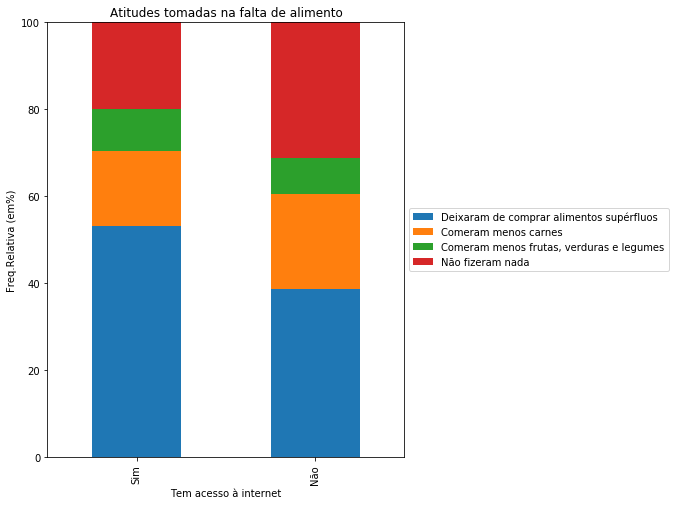

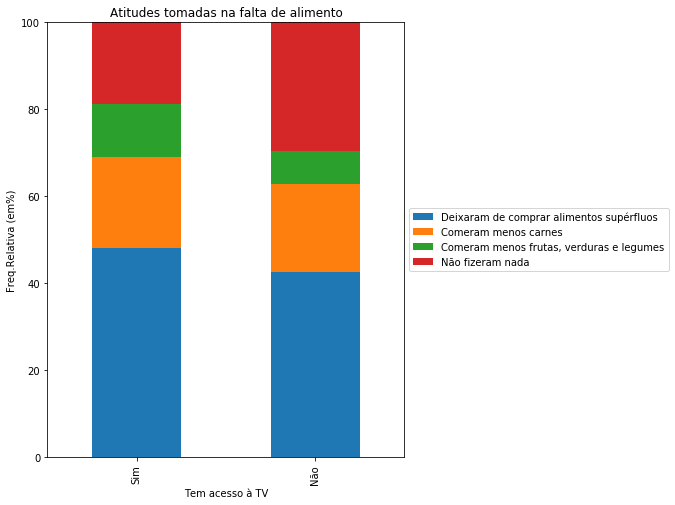

In [237]:
print("Comparação das atitudes tomadas em relação à presença de meios de informação (TV ou Internet) na casa das pessoas")
plot = dadoscrossIxA.iloc[0:4,:].T.plot(kind='bar', stacked=True,title='Atitudes tomadas na falta de alimento', figsize=(8, 8))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = dadoscrossTxA.iloc[0:4,:].T.plot(kind='bar', stacked=True,title='Atitudes tomadas na falta de alimento', figsize=(8, 8))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Comparação das atitudes tomadas em relação à presença de meios de informação (TV ou Internet) na casa das pessoas


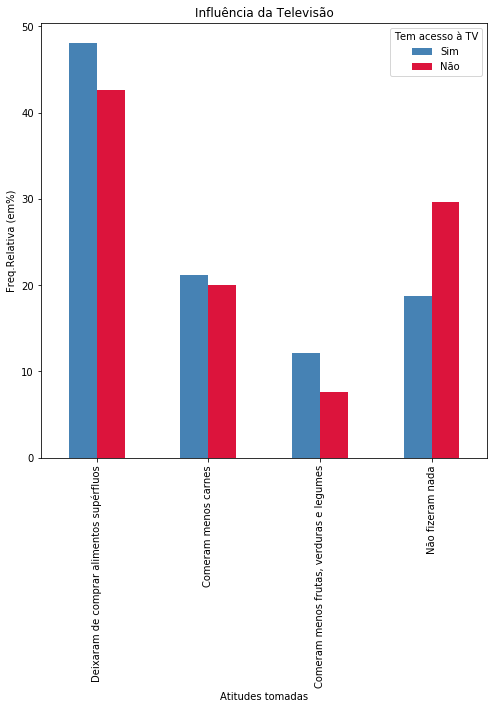

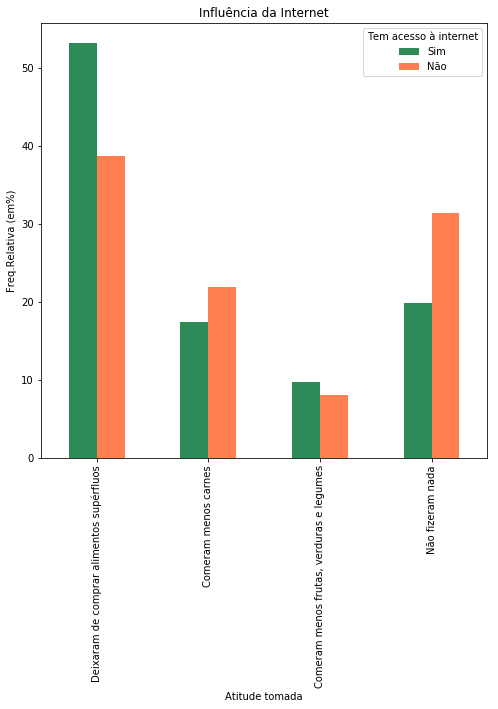

In [238]:
print("Comparação das atitudes tomadas em relação à presença de meios de informação (TV ou Internet) na casa das pessoas")
plot = dadoscrossTxA.plot(kind='bar',title='Influência da Televisão',figsize=(8, 8),color=('steelblue', 'crimson'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Atitudes tomadas')



plot = dadoscrossIxA.plot(kind='bar',title='Influência da Internet',figsize=(8, 8),color=('seagreen','coral'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Atitude tomada')
plt.show()

In [239]:
print("Total, médias e quartis das rendas Per Capita brasileiras")
sal = pd.read_csv('DOM2013.csv',sep=',')
sal = sal[((sal.V4621<999999999999) & (sal.V4621>0))]
sal.loc[:,["V4621"]]
sal.V4621.describe()

Total, médias e quartis das rendas Per Capita brasileiras


count    108864.000000
mean       1131.618248
std        1811.608302
min           1.000000
25%         375.000000
50%         678.000000
75%        1200.000000
max       82000.000000
Name: V4621, dtype: float64

Renda Per Capita domiciliar das pessoas que estão dentro das quatro atitudes comparadas na pesquisa


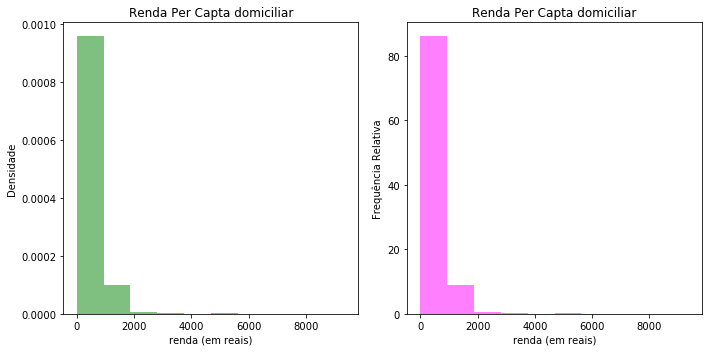

In [240]:
print("Renda Per Capita domiciliar das pessoas que estão dentro das quatro atitudes comparadas na pesquisa")
fig = plt.figure(figsize=(11, 5))
plt.subplot(121)
plot = dados1.Salário.plot.hist(bins=faixa,title='Renda Per Capta domiciliar', figsize=(10, 5), normed=1, alpha=0.5, color='g')
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(122)
plot = dados1.Salário.plot.hist(bins=faixa, title='Renda Per Capta domiciliar', weights=zeros_like(dados1.Salário)+1./dados1.Salário.size*100, figsize=(10, 5), color = ('fuchsia'), alpha=0.5)
plt.ylabel('Frequência Relativa')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()

Renda Per Capita domiciliar de todas as pessoas que sofrem com a falta de alimentos


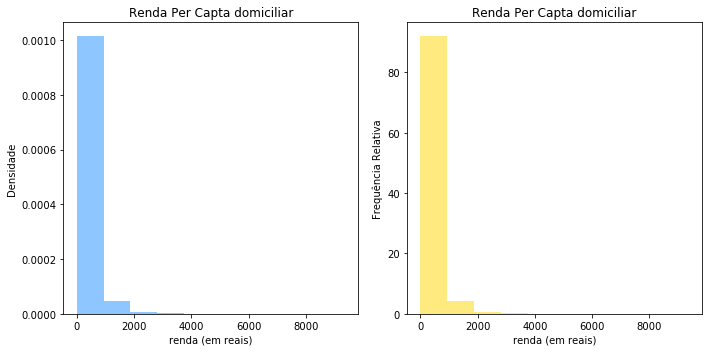

In [241]:
print("Renda Per Capita domiciliar de todas as pessoas que sofrem com a falta de alimentos")
fig = plt.figure(figsize=(11, 5))
plt.subplot(121)
plot = dadosal.V4621.plot.hist(bins=faixa,title='Renda Per Capta domiciliar', figsize=(10, 5), normed=1, alpha=0.5, color='dodgerblue')
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(122)
plot = dadosal.V4621.plot.hist(bins=faixa, title='Renda Per Capta domiciliar', weights=zeros_like(dadosal.V4621)+1./dadosal.V4621.size*100, figsize=(10, 5), color = ('gold'), alpha=0.5)
plt.ylabel('Frequência Relativa')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()


___
## Conclusão 

Descreva aqui suas conclusões!

O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida?

Bem, feitas as análises podemos tirar algumas conclusões da relação das atitudes tomadas em uma possível escassez de comida com a presença de meios midiáticos na casa das pessoas

Pessoas que possuem televisão: foi possível observar mudanças no comportamento das atitudes das pessoas quando comparamos a presença de televisores nas residências. É possível ver que quando as pessoas tem TV em casa elas optam muito mais por deixar de comprar alimentos supérfluos(48.02% versus 42.66%), o que é algo positivo para a alimentação, já que alimentos supérfluos normalmente são processados e industrializados, e por sua vez longe de serem saudáveis. Um dado interessante também é que em casas que não possuem televisores as pessoas tendem muito mais a simplesmente não fazerem nada quando falta alimento (18.73% versus 29.64%), ou seja, pela falta de informações as pessoas devem achar que não tem o que fazer e simplesmente tem que viver com a falta de alimento até que a situação se normalize, o que é algo muito ruim também; talvez com acesso à certas informações as pessoas teriam ideia de como reverter o quadro de insuficiência alimentar.

Pessoas que possuem internet: também pode-se observar mudanças no comportamento das pessoas com a existência de internet na casa delas. Em relação à alimentos supérfluos a diferença foi alta, 53.11% das pessoas com acesso à internet deixaram de comprar alimentos supérfluos, contra 38.73% das pessoas que não possuem internet. No dado de "não fizeram nada" também existe a diferença na quantidade de respostas, 19.84% das pessoas com acesso à internet não fizeram nada durante uma crise alimentar, enquanto 31.31% das pessoas sem internet não fizeram nada. Mais uma vez o acesso à mídia e à informações provavelmente ajudou a guiar as pessoas para fazerem escolhas em momentos de crise.

Porém, tanto nas pessoas com TV quanto nas pessoas com internet, tivemos o resultado inesperado em dois dados. Refiro-me aos dados: "Comeram menos carnes" e "Comeram menos frutas, legumes e verduras". As pessoas com acesso à mídia ficaram na frente dessas atitudes em quase todos os resultados (só tiveram menor porcentagem no resultado das pessoas que comeram menos carne com acesso à internet), pode-se tentar explicar isso pelos outros resultados. Como menos pessoas ficaram sem fazer nada quando tinham acesso à informações é de se esperar que o número de respostas voltadas as mais diversas atitudes seja maior, não importa a atitude.

Como principal resultado temos que o acesso à informações fazem sim com que as pessoas tomem uma atitude, qualquer que ela seja; a única coisa que talvez tenha que ser trabalhada é qual a atitude que as pessoas tomarão, mas isso fica como objetivo dos meios midiáticos.

E sobre nossa última variável, a renda. Com a renda tentei traçar um perfil do tipo de pessoa que sofre com a falta de alimentos em sua vida, para que talvez fosse possível chegar em alguma conclusão, e para isso plotei quatro gráficos, dois (densidade e frequência relativa) sobre a renda das pessoas que se encaixam nas variáveis estudadas no projeto, e mais dois (densidade e frequência relativa) sobre a renda das pessoas que sofrem com a falta de alimentos (não importando a atitude que tomam em tal situação). Após a plotagem desses gráficos é possível concluir que a maioria das pessoas que sofrem com a falta de alimentos são as que tem a menor renda per capta do país (até um salário mínimo), ou seja, são pessoas que não possuem um grande poder aquisitivo.

Meios televisivos ou de internet estão cada vez mais baratos no Brasil, mas ainda são caros para as pessoas que ganham até um salário mínimo, e foi visto que esses meios ajudam, e muito, na melhoria da segurança alimentar na vida das pessoas que sofrem com a falta de alimentos, pois as informações que elas recebem através desses meios as ajudam a tomarem decisões para reverterem tal quadro. Assim pode-se ver que tais meios são muito importantes, e talvez devesse existir um programa federal, estadual, municipal ou de iniciativa privada para ajudar tais pessoas a adquirerem uma TV ou um acesso à internet, para quem sabe cada vez mais brasileiros tenham uma alimentação saudável.